## Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
fill_age = df.age.mean()

In [5]:
df['age'] = df['age'].fillna(fill_age)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df['deck'].value_counts(dropna=False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

<Axes: >

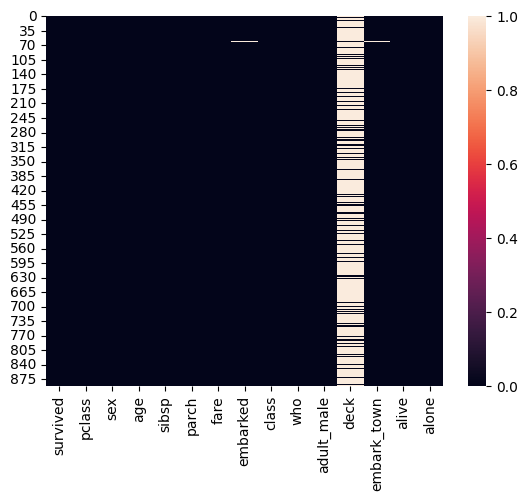

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['embarked'].isnull().sum()

np.int64(2)

In [10]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['embarked'] = df['embarked'].fillna('C')

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [14]:
df['embark_town'] = df['embark_town'].fillna('Cherbourg')

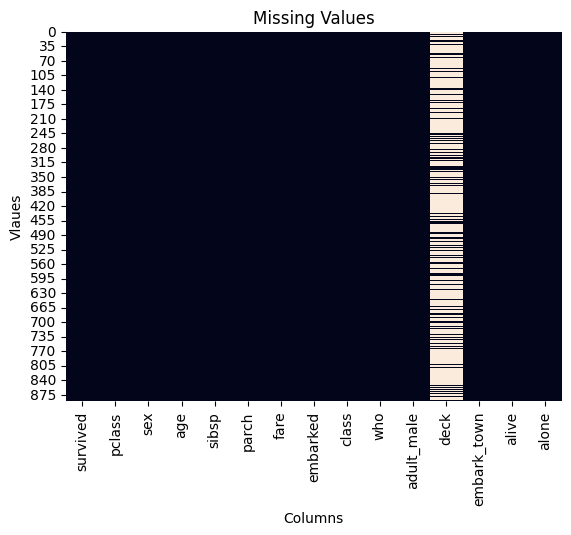

In [15]:
sns.heatmap(df.isnull(),cbar=False)
plt.xlabel("Columns")
plt.ylabel('Vlaues')
plt.title("Missing Values")
plt.show()

In [16]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [17]:
df.nunique()

survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [18]:
df.groupby('class')['fare'].mean()

C:\Users\MR OSMAN\AppData\Local\Temp\ipykernel_12776\4105422611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [19]:
df.groupby(['survived','sex'])['fare'].mean()

survived  sex   
0         female    23.024385
          male      21.960993
1         female    51.938573
          male      40.821484
Name: fare, dtype: float64

## Correlation matrix

In [20]:
# make corr only for the mumeric and float values
correlation = df[['fare','age','sibsp']].corr()

<Axes: >

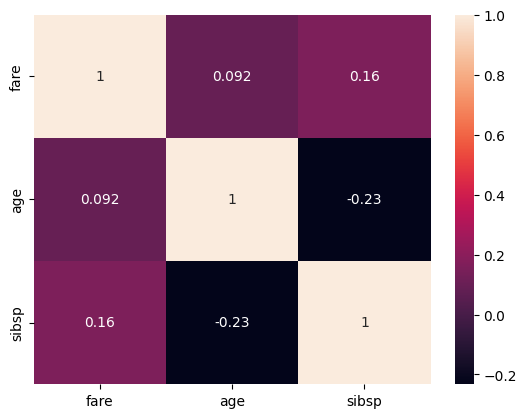

In [21]:
sns.heatmap(correlation, annot=True)

*close the value to 1 show direct proportion and vise virsa* 

In [22]:
# Compairing every cloumns with all columns
# sns.pairplot(df)

## EDA Steps
1. Composition
2. Correlation
3. Distribution
4. Comparsion

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [24]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

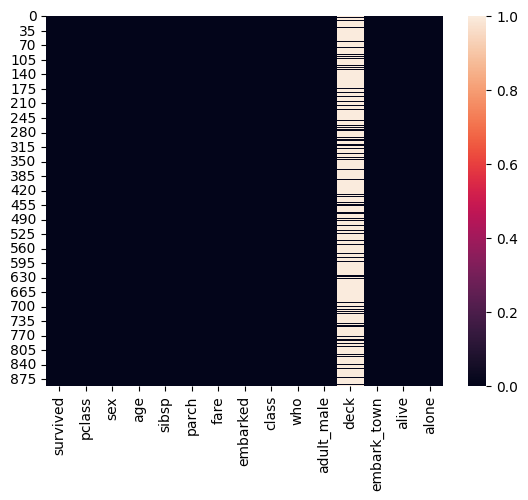

In [25]:
sns.heatmap(df.isnull())

In [ ]:
# If the values are below the 15% then it's ok to fill them ohter vise remove the column
df.isnull().sum() / len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.000000
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [27]:
df.drop(columns=['deck'],axis=1,inplace=True)

In [28]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [33]:
print(df['age'].mean())
print(df['age'].median())
print(df['age'].mode(1))

29.69911764705882
29.69911764705882
0    29.699118
Name: age, dtype: float64


<Axes: >

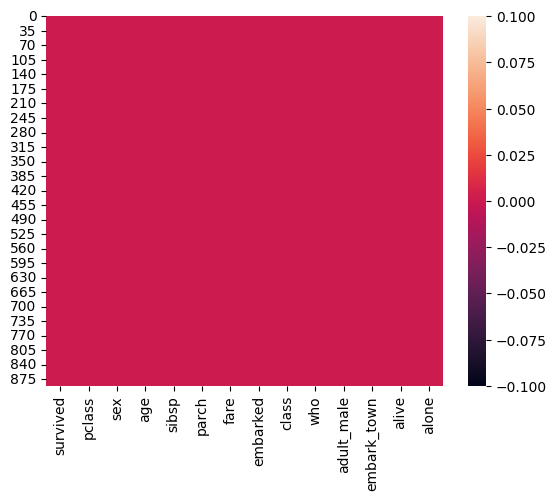

In [34]:
sns.heatmap(df.isnull())

## Binning the Data

**Binning the data into diferent catagories**

<Axes: xlabel='age', ylabel='Count'>

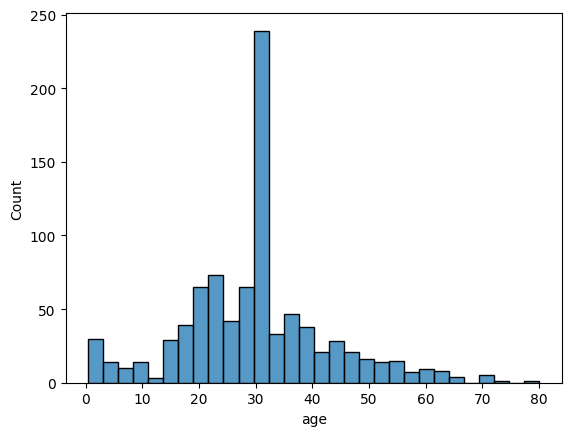

In [39]:
sns.histplot(df['age'])

In [36]:
bins = [0,1,5,12,18,30,50,80]
lables = ['Infants','Toddlers','Kids','Teens','Youngs','Middle Aged','Old']

df['binned_age'] = pd.cut(df['age'], bins=bins, labels=lables)

In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [38]:
df['binned_age'].value_counts()

binned_age
Youngs         447
Middle Aged    241
Teens           70
Old             64
Toddlers        30
Kids            25
Infants         14
Name: count, dtype: int64

In [40]:
# Rename the column Name
df.rename(columns={'binned_age':'age_group'},inplace=True)

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [49]:
df.groupby(['survived', 'age_group']).size().loc[1].sort_values(ascending=False)

C:\Users\MR OSMAN\AppData\Local\Temp\ipykernel_12776\2027007000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['survived', 'age_group']).size().loc[1].sort_values(ascending=False)


age_group
Youngs         148
Middle Aged    102
Teens           30
Old             22
Toddlers        19
Infants         12
Kids             9
dtype: int64

In [56]:
# now filter the data
df_01 = df[['survived','sex','class','fare','age_group']]

In [57]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   891 non-null    int64   
 1   sex        891 non-null    object  
 2   class      891 non-null    category
 3   fare       891 non-null    float64 
 4   age_group  891 non-null    category
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 23.2+ KB


In [58]:
df_01['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [59]:
# filtering on the basis of each column values
df_01[df_01['survived']==1]
# only survived

,survived,sex,class,fare,age_group
1,1,female,First,71.2833,Middle Aged
2,1,female,Third,7.9250,Youngs
3,1,female,First,53.1000,Middle Aged
8,1,female,Third,11.1333,Youngs
9,1,female,Second,30.0708,Teens
...,...,...,...,...,...
875,1,female,Third,7.2250,Teens
879,1,female,First,83.1583,Old
880,1,female,Second,26.0000,Youngs
887,1,female,First,30.0000,Youngs


In [60]:
df_01[df_01['class']=='First']
# only first class data

,survived,sex,class,fare,age_group
1,1,female,First,71.2833,Middle Aged
3,1,female,First,53.1000,Middle Aged
6,0,male,First,51.8625,Old
11,1,female,First,26.5500,Old
23,1,male,First,35.5000,Youngs
...,...,...,...,...,...
871,1,female,First,52.5542,Middle Aged
872,0,male,First,5.0000,Middle Aged
879,1,female,First,83.1583,Old
887,1,female,First,30.0000,Youngs


In [65]:
print(df['fare'].min())
print(df_01['fare'].max())

0.0
512.3292


In [67]:
# getting only those values that has given more then 200 pounds
df_ameer = df_01[df_01['fare']>200]

In [68]:
df_ameer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 27 to 779
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   20 non-null     int64   
 1   sex        20 non-null     object  
 2   class      20 non-null     category
 3   fare       20 non-null     float64 
 4   age_group  20 non-null     category
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [69]:
df_ameer['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64

*How to Add Two or more Fillters*

In [71]:
df_01[(df_01['fare']>70) &(df_01['class']=="First")].sort_values(by='fare')

,survived,sex,class,fare,age_group
540,1,female,First,71.0000,Middle Aged
745,0,male,First,71.0000,Old
1,1,female,First,71.2833,Middle Aged
366,1,female,First,75.2500,Old
218,1,female,First,76.2917,Middle Aged
...,...,...,...,...,...
341,1,female,First,263.0000,Youngs
438,0,male,First,263.0000,Old
258,1,female,First,512.3292,Middle Aged
737,1,male,First,512.3292,Middle Aged
